In [3]:
import os 
import re
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

M786658
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
M7866

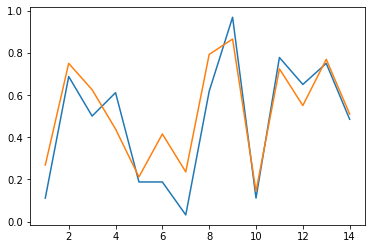

In [56]:
rootdir = '/home/pouple/Documents/Analysis/'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
tag = 'Psyco_all'

for mouse in mice:
    mouse_id = os.path.basename(os.path.normpath(mouse))
    print(mouse_id)

    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path]
    
    if len(datafiles):
        # Get sneakpeak into evolution 
        smoothness = 100
        corrs, stims, outs = [], [], []
        for i, data in enumerate(datafiles):
            
            stim = data['ExperimentInfo']['TrialSequence'][0][0][0]
            corr = data['ExperimentInfo']['Correct'][0][0][0]
            out = data['ExperimentInfo']['OutComeTrials'][0][0][0]
            
            
            stims.append(stim)
            corrs.append(corr)
            outs.append(out)
        stims = np.array([i for s in stims for i in s])
        corrs = np.array([i for s in corrs for i in s])
        outs = np.array([i for s in outs for i in s])
        
        scores = {}
        for t in np.arange(3, 17):
            curr_stim = np.where(stims == t)[0]
            print(outs[curr_stim])
            scores[t] = np.sum(corrs[curr_stim])/len(curr_stim)
                
        scs = [scores[k] for k in scores]
        
    
        idx_gos = np.where(stims == 1)[0]
        idx_nogos = np.where(stims == 2)[0]
        idx_blank = np.where(stims == 0)[0]
        
        #scs = [np.sum(corrs[idx_gos])/len(idx_gos)] + scs
        #scs = scs + [np.sum(corrs[idx_nogos])/len(idx_nogos)]
        #print(scs)
        plt.plot(np.arange(1, 15), scs)
        
        idx_not_blank = [i for i in range(len(stims)) if not i in idx_blank]
    
        
        go_corr = corrs[idx_gos]
        nogo_corr = corrs[idx_nogos]
        blank_corr = corrs[idx_blank]
        
        
        convo_corr = np.convolve(corrs, np.ones(smoothness)/smoothness, mode='same')
        convo_go_corr = np.convolve(go_corr, np.ones(smoothness)/smoothness, mode='valid')
        convo_nogo_corr = np.convolve(nogo_corr, np.ones(smoothness)/smoothness, mode='valid')
        convo_blank_corr = np.convolve(blank_corr, np.ones(smoothness)/smoothness, mode='valid')
            
        """fig, axs = plt.subplots(3, figsize=(12, 12))        
        axs[0].plot(convo_corr, color='blue')
        axs[0].set_ylim((0, 1))
        axs[0].grid()
        
        plt.title('{}'.format(np.sum(corrs)/len(corrs)))
        axs[1].plot(convo_go_corr, color='green')
        axs[2].plot(convo_nogo_corr, color='red')
        #plt.plot(convo_blank_corr, color='purple')
        
        plt.plot
        plt.ylim((0, 1))
        plt.xlabel('# Trials')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.savefig('{}.svg'.format(mouse_id))
        plt.show()"""


['PT_6000Hz_500ms_70dB_latent_dlp.npy', 'PT_6405Hz_500ms_70dB_latent_dlp.npy', 'PT_6838Hz_500ms_70dB_latent_dlp.npy', 'PT_7300Hz_500ms_70dB_latent_dlp.npy', 'PT_7793Hz_500ms_70dB_latent_dlp.npy', 'PT_8320Hz_500ms_70dB_latent_dlp.npy', 'PT_8882Hz_500ms_70dB_latent_dlp.npy', 'PT_9482Hz_500ms_70dB_latent_dlp.npy', 'PT_10123Hz_500ms_70dB_latent_dlp.npy', 'PT_10807Hz_500ms_70dB_latent_dlp.npy', 'PT_11537Hz_500ms_70dB_latent_dlp.npy', 'PT_12317Hz_500ms_70dB_latent_dlp.npy', 'PT_13150Hz_500ms_70dB_latent_dlp.npy', 'PT_14038Hz_500ms_70dB_latent_dlp.npy', 'PT_14987Hz_500ms_70dB_latent_dlp.npy', 'PT_16000Hz_500ms_70dB_latent_dlp.npy']


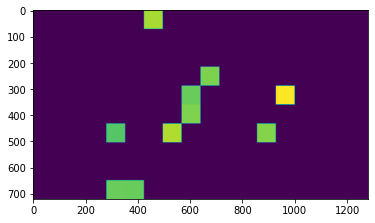

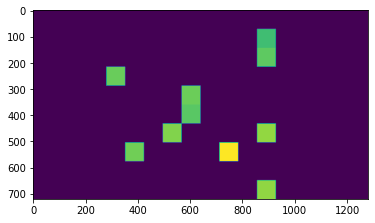

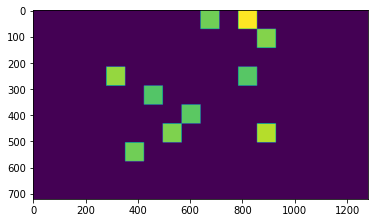

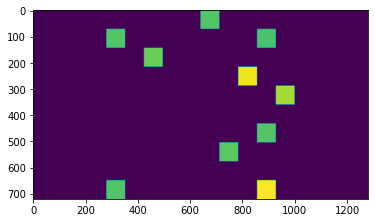

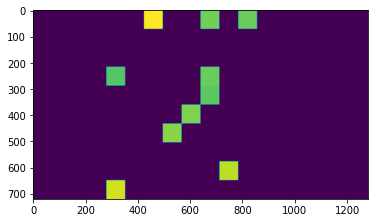

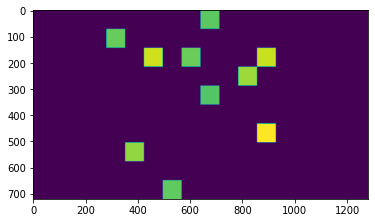

In [51]:
import natsort as n
rootdir = '/home/pouple/Documents/psychometric_all/npy/'
print(n.natsorted(os.listdir(rootdir)))
stims = np.array([np.load(os.path.join(rootdir, f)) for f in n.natsorted(os.listdir(rootdir))])
#3 9 , 10, 12, 14
for s in stims[[0, 2, 8, 9, 11, 13]]:
    plt.imshow(s)
    plt.show()
    plt.close()